## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


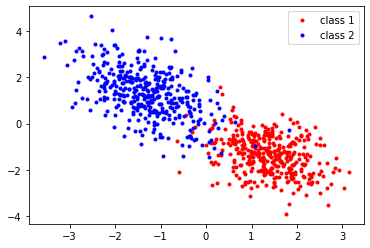

In [4]:
class1_x, class1_y, class2_x, class2_y = [], [], [], []

for i in range(len(x_train)):
    if y_train[i] == 0:
        class1_x.append(x_train[i][0])
        class1_y.append(x_train[i][1])
    else:
        class2_x.append(x_train[i][0])
        class2_y.append(x_train[i][1])

# Plot the data of each class
plt.plot(class1_x, class1_y, '.', color='red', label='class 1')
plt.plot(class2_x, class2_y, '.', color='blue', label='class 2')
plt.legend()

In [5]:
# Construct the data matrix of each class
class1_x_column_vector = np.array([class1_x]).T
class1_y_column_vector = np.array([class1_y]).T
class1 = np.concatenate((class1_x_column_vector, class1_y_column_vector), axis=1)
print(class1.shape)

class2_x_column_vector = np.array([class2_x]).T
class2_y_column_vector = np.array([class2_y]).T
class2 = np.concatenate((class2_x_column_vector, class2_y_column_vector), axis=1)
print(class2.shape)

(369, 2)
(381, 2)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
# Calculate the mean of each class
m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)

In [7]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 1.3559426  -1.34746216] mean vector of class 2: [-1.29735587  1.29096203]


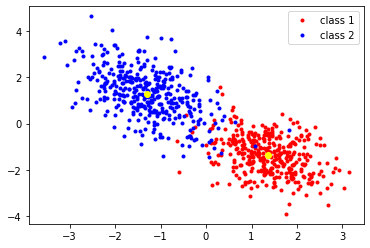

In [8]:
# Plot the mean of each class with yellow dot
plt.plot(class1_x, class1_y, '.', color='red', label='class 1')
plt.plot(class2_x, class2_y, '.', color='blue', label='class 2')
plt.plot(m1[0], m1[1], 'o', color='yellow')
plt.plot(m2[0], m2[1], 'o', color='yellow')
plt.legend()

## 2. Compute the Within-class scatter matrix SW

In [9]:
def calCovariance(X, mean):
    """Calculate the covarance matrix of input data X
    
    Arguments:
    X -- input data
    mean -- mean of X
    """
    row, col = X.shape
    fact = row - 1
    X = X - mean
    S_k = np.dot(X.T, X.conj()) / fact
    return S_k

In [10]:
s_1 = calCovariance(class1, m1)
s_2 = calCovariance(class2, m2)
sw = s_1 + s_2

In [11]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW:\n{sw}")

Within-class scatter matrix SW:
[[ 1.03674751 -0.60862403]
 [-0.60862403  1.7731047 ]]


## 3.  Compute the Between-class scatter matrix SB

In [ ]:
## Your code HERE


In [ ]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

## 4. Compute the Fisher’s linear discriminant

In [ ]:
## Your code HERE


In [ ]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [ ]:
acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy of test-set {acc}")

## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)